In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style(style="whitegrid")
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [129]:
df = pd.read_csv("/content/sample_data/TSM.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df.head()

,TSM,NVDA,MU,Gold,Silver,Platinium,Paladium,Copper
Date,,,,,,,,
2010-01-04,7.298709,0.423830,10.597220,1117.699951,17.440001,1517.300049,419.799988,3.3880
2010-01-05,7.267193,0.430019,10.909765,1118.099976,17.781000,1530.800049,420.350006,3.3960
2010-01-06,7.241982,0.432770,10.958601,1135.900024,18.163000,1552.199951,425.600006,3.4775
2010-01-07,7.002473,0.424289,10.587452,1133.099976,18.333000,1553.000000,422.950012,3.4115
2010-01-08,6.996171,0.425206,10.841397,1138.199951,18.458000,1564.599976,424.149994,3.3880


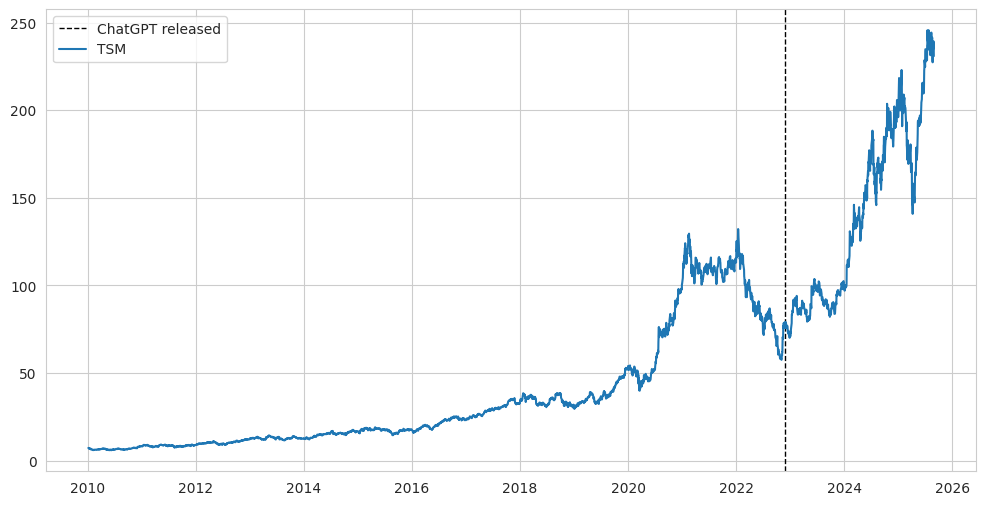

In [130]:
plt.figure(figsize=(12, 6))
plt.axvline(x=pd.to_datetime("2022-11-30"), ls='--', color="black", label="ChatGPT released", lw=1)
plt.plot(df["TSM"], label="TSM")
plt.legend()
plt.show()

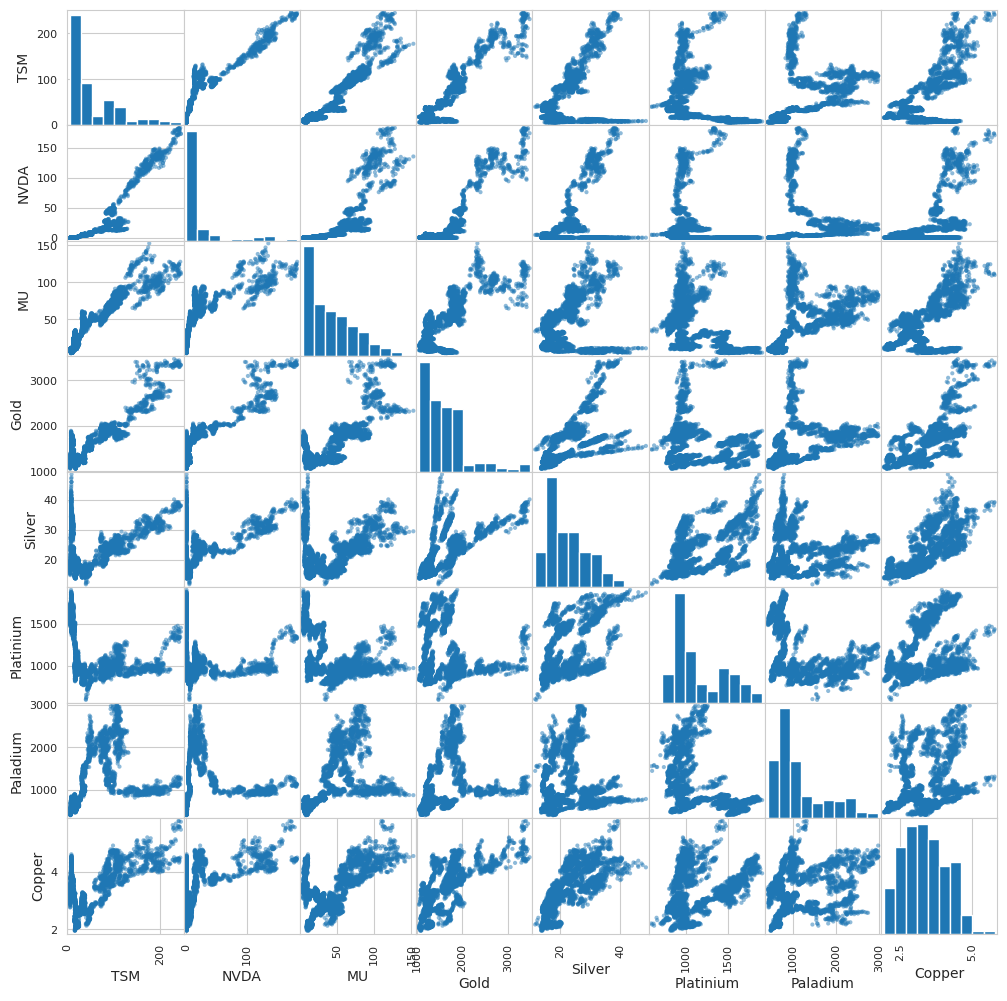

In [131]:
#Use the scatter_matrix function to start exploration relationship between all the columns.
pd.plotting.scatter_matrix(df,alpha=0.5,figsize=(12,12),diagonal='hist')
plt.show()

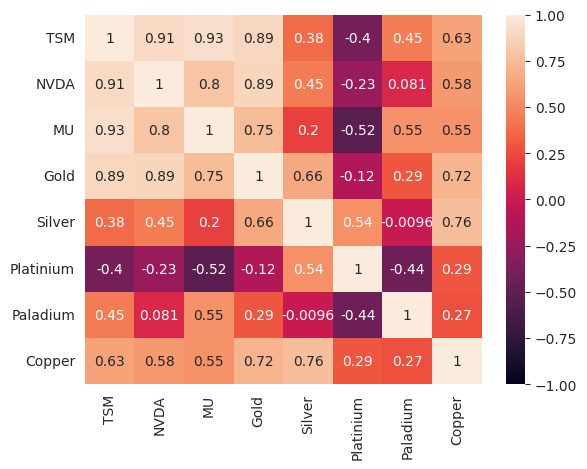

In [132]:
#Use the heatmap function with the corr method on the dataframe and plot the result.
sns.heatmap(df.corr('pearson'), vmin=-1, vmax=1, annot=True)
plt.show()

In [133]:
#df = df.drop(['Silver','Platinium','Paladium','Copper'],axis=1)
columns_to_keep = df.columns[(df.corr()["TSM"] > 0.5)]
df = df[columns_to_keep]
df.head()
#Tips: Know which model you are gonna use so that you can choose the data.E.g. here, we chose the linear correlation as we are gonna use linear model

,TSM,NVDA,MU,Gold,Copper
Date,,,,,
2010-01-04,7.298709,0.423830,10.597220,1117.699951,3.3880
2010-01-05,7.267193,0.430019,10.909765,1118.099976,3.3960
2010-01-06,7.241982,0.432770,10.958601,1135.900024,3.4775
2010-01-07,7.002473,0.424289,10.587452,1133.099976,3.4115
2010-01-08,6.996171,0.425206,10.841397,1138.199951,3.3880


In [134]:
#Define a train_test_time_splitting function that split a matrix of feature X and a target vector y according to a train_ratio
def train_test_time_splitting(X, y, train_ratio=0.70):
    index = int(df.shape[0] * train_ratio)
    X_train, y_train = X.iloc[:index], y[:index]
    X_test, y_test = X.iloc[index:], y[index:]
    return X_train, X_test, y_train, y_test

In [135]:
#Define a function that build lags, rolling and return features (each being optionnal) for a dataframe and specifics columns. Also specify the periods length.
def add_lag_rolling_features(df, columns, values, lags=True, rolling_avg=True, rolling_std=True, pct_change=True):
    for column in columns:
        for value in values:
            if lags: df[f"{column}_lag{value}"] = df[column].shift(periods=value)
            if rolling_avg: df[f"{column}_rolling_avg{value}"] = df[column].rolling(window=value).mean()
            if rolling_std: df[f"{column}_rolling_std{value}"] = df[column].rolling(window=value).std()
            if pct_change: df[f"{column}_return{value}"] = df[column].pct_change(periods=value)
    return df

In [136]:
#Use the previous function to compute rolling features of your choice.
columns = ["TSM", "NVDA", "MU", "Gold", "Copper"]

df = add_lag_rolling_features(df, columns=columns, values=[7, 14, 28], lags=False, rolling_std=False, pct_change=False)
df = df.dropna()
df.tail()

,TSM,NVDA,MU,Gold,Copper,TSM_rolling_avg7,TSM_rolling_avg14,TSM_rolling_avg28,NVDA_rolling_avg7,NVDA_rolling_avg14,NVDA_rolling_avg28,MU_rolling_avg7,MU_rolling_avg14,MU_rolling_avg28,Gold_rolling_avg7,Gold_rolling_avg14,Gold_rolling_avg28,Copper_rolling_avg7,Copper_rolling_avg14,Copper_rolling_avg28
Date,,,,,,,,,,,,,,,,,,,,
2025-08-25,235.589996,179.799866,116.419998,3373.800049,4.4665,233.928574,237.295714,238.728930,178.029957,179.846999,177.176437,119.081430,119.581429,115.209286,3344.228516,3358.921404,3356.560695,4.445071,4.444214,4.864875
2025-08-26,238.720001,181.759750,116.500000,3388.600098,4.4505,233.905716,237.820715,238.483215,178.218519,180.014847,177.489634,118.457144,120.132858,115.325000,3351.742815,3359.535697,3358.292838,4.441143,4.448464,4.827893
2025-08-27,239.289993,181.589767,117.750000,3404.600098,4.4145,233.602857,237.582857,238.443572,178.159954,180.074129,177.817830,117.628572,120.552858,115.445000,3362.157122,3359.842843,3360.135699,4.435071,4.451036,4.786339
2025-08-28,238.270004,180.159836,122.000000,3431.800049,4.4635,234.398573,237.328572,238.422858,178.807059,179.893425,178.131740,117.621428,120.775000,115.758214,3379.071429,3359.321411,3361.203561,4.442857,4.451607,4.745375
2025-08-29,230.869995,174.170166,119.010002,3473.699951,4.5185,234.722857,236.527143,238.289643,178.632782,179.330599,178.387082,117.878572,120.438572,116.107857,3397.685721,3367.935686,3362.435704,4.456071,4.458393,4.703286


In [137]:
# Define a function that takes a dataset with features, the target column and the features columns. Then the function will split, train and display performance on the test according to the three above metrics(RMSE,MAE,R2), and display the performance of the baseline.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

def experiment_ticker(df, ticker, columns_to_keep=None):
  #given in solution
    if columns_to_keep is None:
        columns_to_keep = [column for column in df.columns if ("_" in column)]

    X = df[columns_to_keep]
    y = df[ticker]

    X_train, X_test, y_train, y_test = train_test_time_splitting(X, y)
    pipe = Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ])

    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    metrics = {
        "ticker": ticker,

        "RMSE_model": root_mean_squared_error(y_true=y_test, y_pred=y_pred),
        "RMSE_rolling_avg7": root_mean_squared_error(y_true=y_test, y_pred=X_test[f"{ticker}_rolling_avg7"]),

        "MAE_model": mean_absolute_error(y_true=y_test, y_pred=y_pred),
        "MAE_rolling_avg7": mean_absolute_error(y_true=y_test, y_pred=X_test[f"{ticker}_rolling_avg7"]),

        "R2_model": r2_score(y_true=y_test, y_pred=y_pred),
        "R2_rolling_avg7": r2_score(y_true=y_test, y_pred=X_test[f"{ticker}_rolling_avg7"])
    }

    return metrics


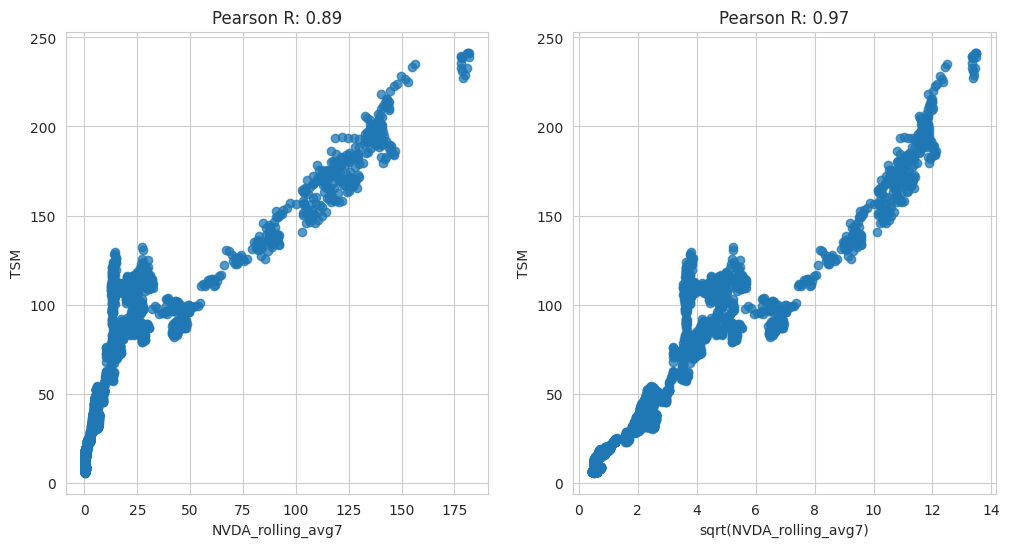

In [138]:
import numpy as np
from scipy.stats import pearsonr

column = "NVDA_rolling_avg7"
function = np.sqrt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df[column], df["TSM"], alpha=0.75)
plt.xlabel(column)
plt.ylabel("TSM")
results = pearsonr(x=df[column], y=df["TSM"])
plt.title(f"Pearson R: {results.correlation:0.2f}")

plt.subplot(1, 2, 2)
plt.scatter(function(df[column]), df["TSM"], alpha=0.75)
plt.xlabel(f"{function.__name__}({column})")
plt.ylabel("TSM")
results = pearsonr(x=function(df[column]), y=df["TSM"])
plt.title(f"Pearson R: {results.correlation:0.2f}")

plt.show()


In [139]:
for column in ["NVDA_rolling_avg7", "NVDA_rolling_avg14", "NVDA_rolling_avg28"]:
    df[f"{column}_sqrt"] = np.sqrt(df[column])

experiment_ticker(df, "TSM", columns_to_keep=[
    "TSM_rolling_avg7", "TSM_rolling_avg14", "TSM_rolling_avg28",
    "NVDA_rolling_avg7_sqrt", "NVDA_rolling_avg14_sqrt", "NVDA_rolling_avg28_sqrt"])

{'ticker': 'TSM',
 'RMSE_model': 3.541220388194224,
 'RMSE_rolling_avg7': 3.8724296185249965,
 'MAE_model': 2.635609022181459,
 'MAE_rolling_avg7': 2.823139498482438,
 'R2_model': 0.9923234920388873,
 'R2_rolling_avg7': 0.990820376710585}